In [14]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt

In [15]:
input_path = "C:/Users/Lindsey/Desktop/Daily-Bruin/the-stack/datasets/student-demographics-hsis/"

In [33]:
df = pd.read_csv(input_path + "DOEGrantMoney.csv", encoding="ISO-8859-1",  index_col=0)

In [34]:
df.head(15)

,Campus,Number of Awards,Dollar Amount of Awards
Year,,,
2005-06,Riverside,2,570371
2005-06,Davis,3,738838
2005-06,Santa Barbara,5,740236
2005-06,Irvine,7,1110897
2005-06,San Diego,4,1141138
2005-06,Santa Cruz,3,2382488
2005-06,Los Angeles,14,4504376
2005-06,Merced,0,0
2005-06,Berkeley,0,0


In [98]:
df_Berkeley = df[df["Campus"]=="Santa Barbara"]

In [99]:
df_Berkeley.head(15)

,Campus,Number of Awards,Dollar Amount of Awards
Year,,,
2005-06,Santa Barbara,5,740236
2006-07,Santa Barbara,7,1276720
2007-08,Santa Barbara,4,336040
2008-09,Santa Barbara,6,964394
2009-10,Santa Barbara,4,631804
2010-11,Santa Barbara,6,649588
2011-12,Santa Barbara,5,662497
2012-13,Santa Barbara,3,177688
2013-14,Santa Barbara,3,173926


In [100]:
NumAwardList = df_Berkeley["Dollar Amount of Awards"]
YearList = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

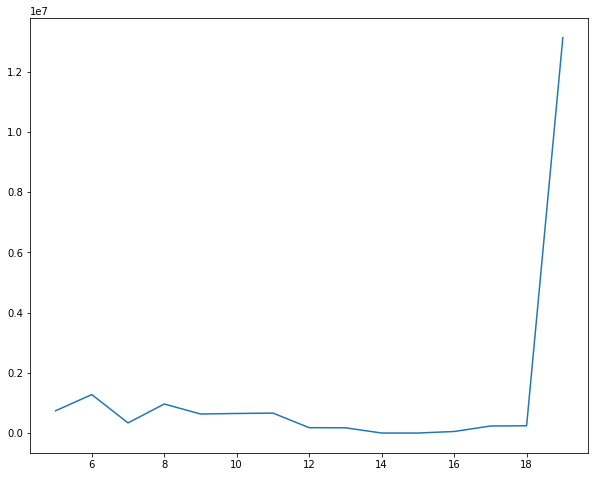

In [101]:
plt.figure(figsize=(10, 8))
plt.plot(YearList, NumAwardList)